In [236]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


data = pickle.load(open('result/config4/no_channel_2/offset_1000/update_6000_random_full.pickle', 'rb'))
per, pos_reward, send_nodes, success_nodes, real_field, constructed_field, temp= data
random_para = np.arange(0.05,1.01,0.05)
n_para = per.shape[0]
repeat = per.shape[1]
steps = per.shape[2]

print(pos_reward.shape)


(20, 20, 1000, 36)


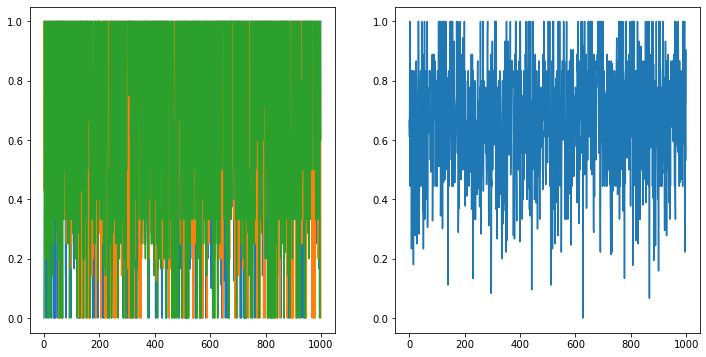

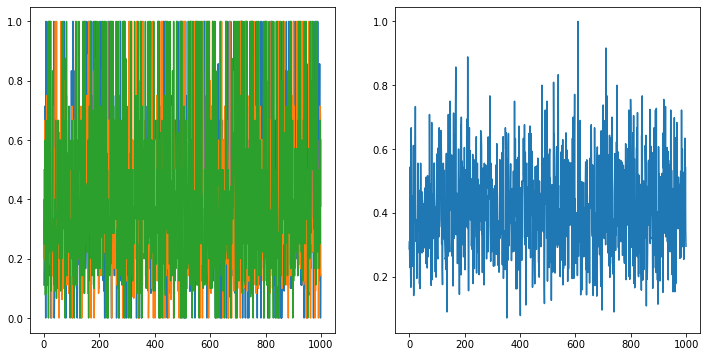

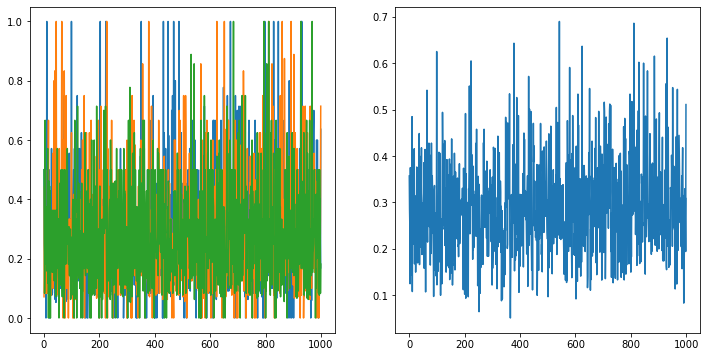

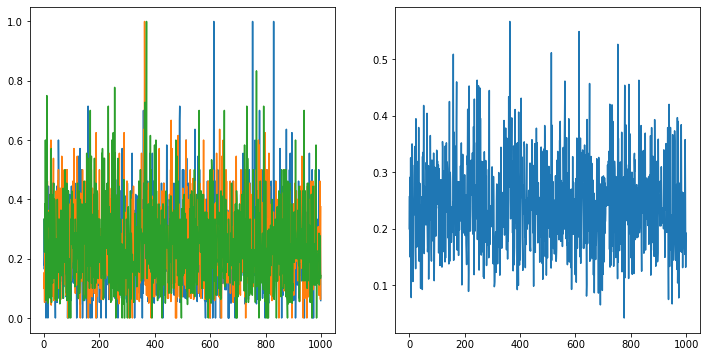

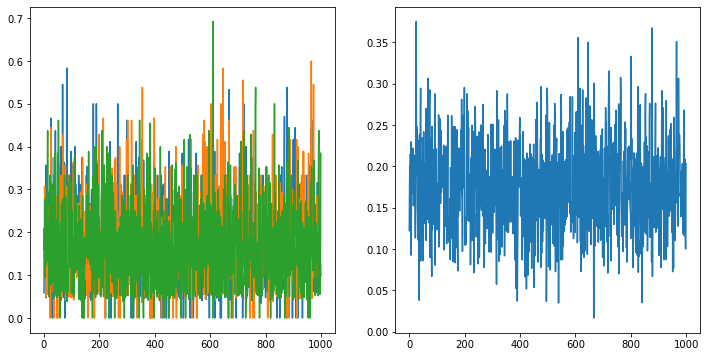

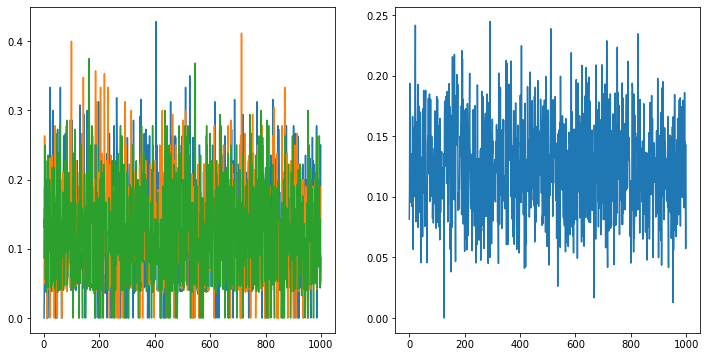

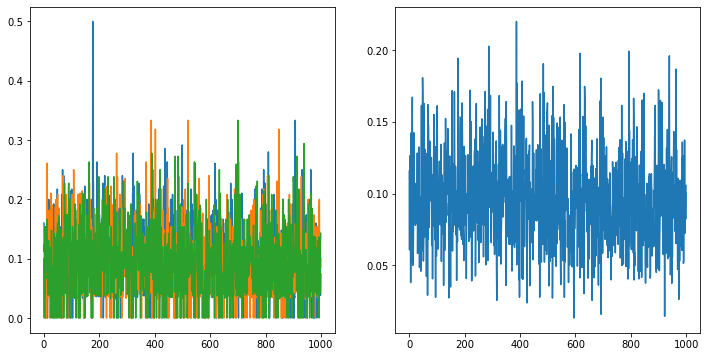

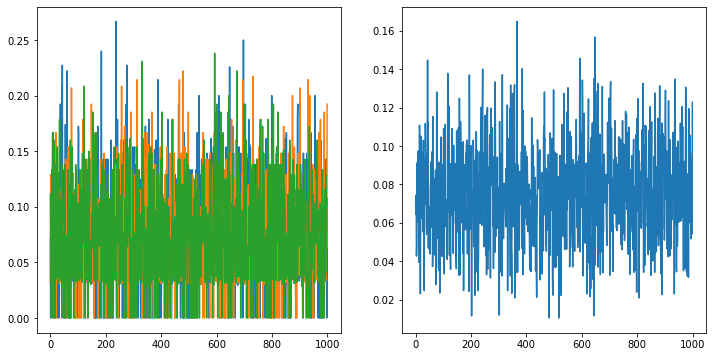

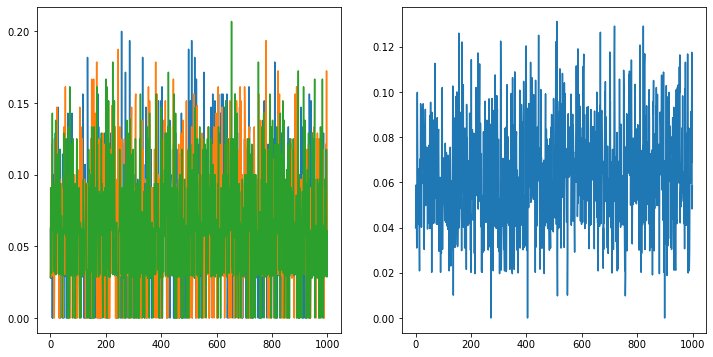

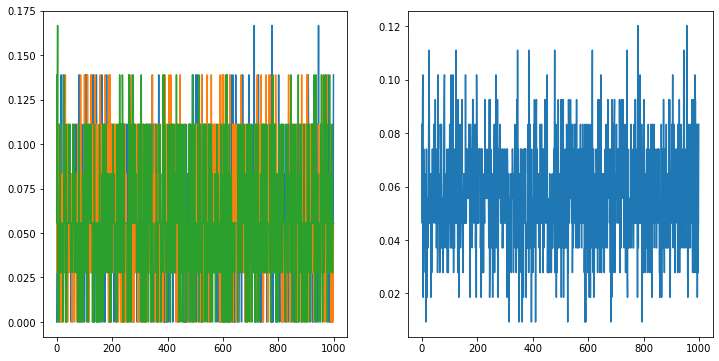

In [234]:

def plot_repeat(per):
    for i in range(n_para):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
        for j in range(repeat):
            ax1.plot(per[i,j,:])
        ax2.plot(np.average(per[i], axis=0))
    plt.show()

plot_repeat(per)

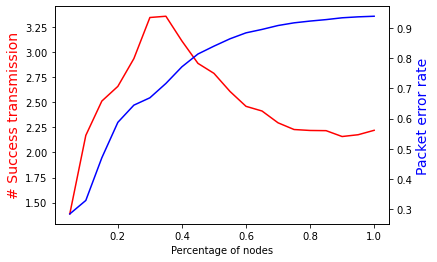

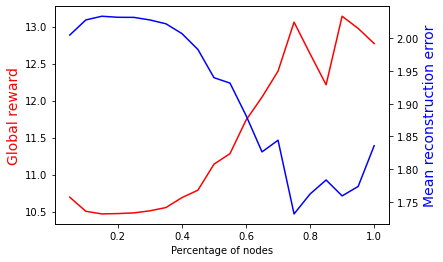

In [242]:
per_average = np.average(per, axis=1)
per_average = np.average(per_average[:,-500:], axis=1)

success = np.sum(np.absolute(success_nodes), axis=3)
success_average = np.average(success, axis=1)
success_average = np.average(success_average[:,-500:], axis=1)

diff = np.absolute(real_field - constructed_field)
mean_error = np.average(diff, axis=3)
mean_error_average = np.average(mean_error, axis=1)
mean_error_average = np.average(mean_error_average[:,-200:], axis=1)

total_reward = np.sum(np.exp(-diff), axis=3)
total_reward_average = np.average(total_reward, axis=1)
total_reward_average = np.average(total_reward_average[:,-500:], axis=1)


# reward1 = np.sum(pos_reward, axis=3)
# reward1_average = np.average(reward1, axis=1)
# reward1_average = np.average(reward1_average[:,-500:], axis=1)

# reward2 = np.zeros(per.shape)
# for i in range(n_para):
#     for j in range(repeat):
#         for k in range(steps):
#             idx = np.where(success_nodes[i,j,k] == 1)
#             count = np.absolute(diff[i,j,k, idx])
#             reward2[i,j,k] = np.sum(np.exp(-count))
# reward2_average = np.average(reward2, axis=1)
# reward2_average = np.average(reward2_average[:,-500:], axis=1)
            
ax = plt.subplot()
ax.plot(random_para, success_average, color="red")
ax.set_ylabel("# Success transmission",color="red",fontsize=14)
ax.set_xlabel("Percentage of nodes")
ax2=ax.twinx()
ax2.plot(random_para, 1 - per_average,color="blue")
ax2.set_ylabel("Packet error rate",color="blue",fontsize=14)
plt.show()

# ax = plt.subplot()
# ax.plot(random_para, reward2_average, color="red")
# ax.set_ylabel("Reward2 of successful nodes",color="red",fontsize=14)
# ax.set_xlabel("Percentage of nodes")
# ax2=ax.twinx()
# ax2.plot(random_para, reward1_average,color="blue")
# ax2.set_ylabel("Reward1 of successful nodes",color="blue",fontsize=14)
# plt.show()


# print(total_reward1_average)
ax = plt.subplot()
ax.plot(random_para, total_reward_average, color="red")
ax.set_ylabel("Global reward",color="red",fontsize=14)
ax.set_xlabel("Percentage of nodes")
ax2=ax.twinx()
ax2.plot(random_para, mean_error_average,color="blue")
ax2.set_ylabel("Mean reconstruction error",color="blue",fontsize=14)
plt.show()


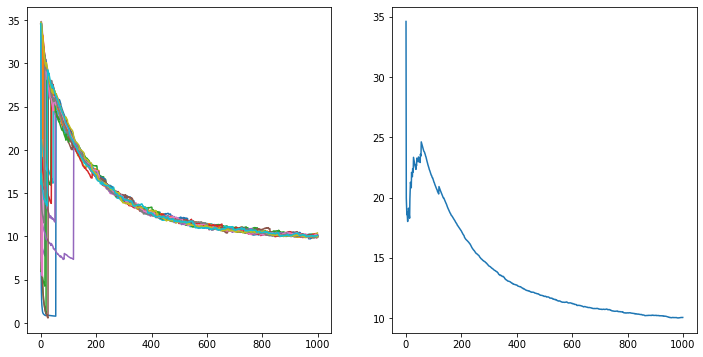

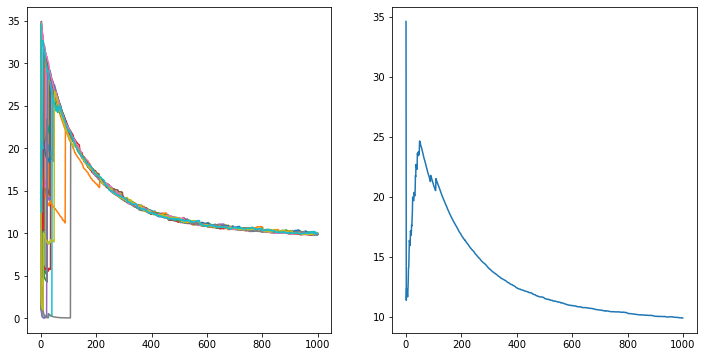

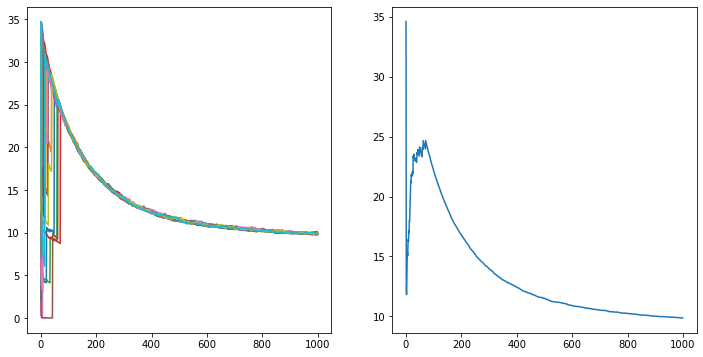

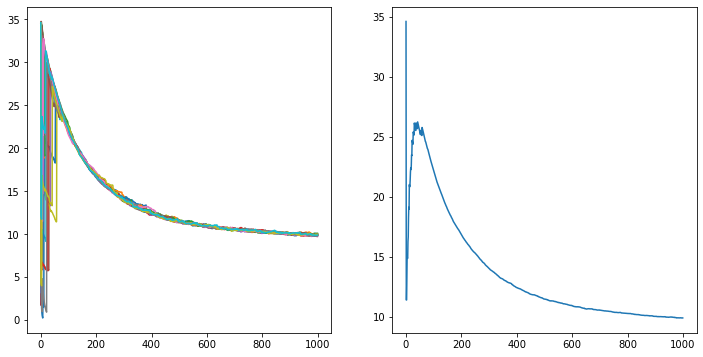

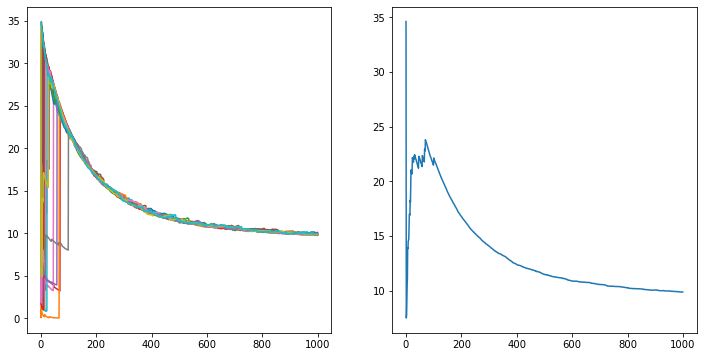

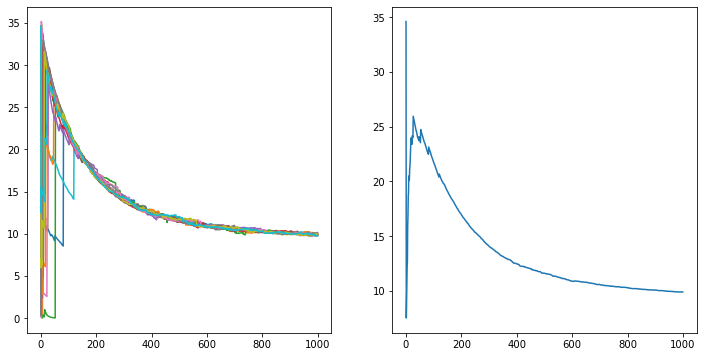

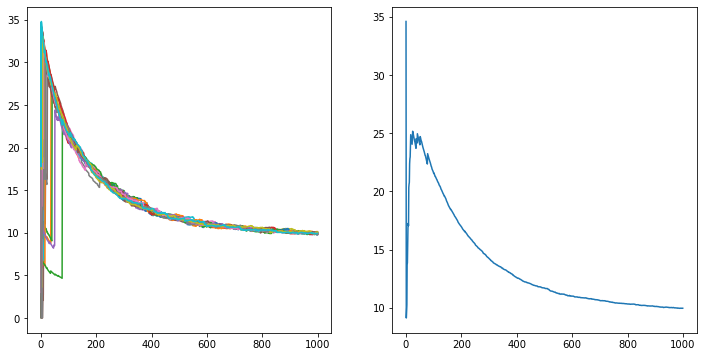

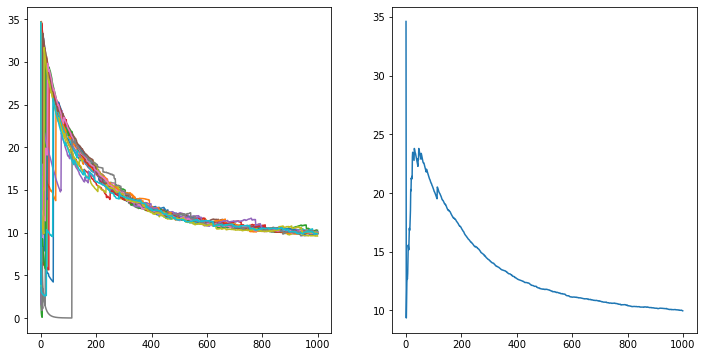

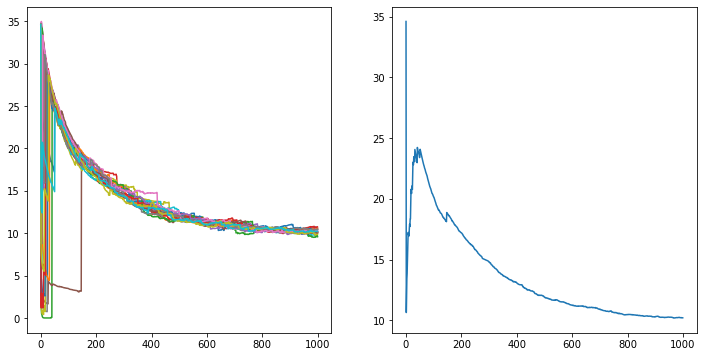

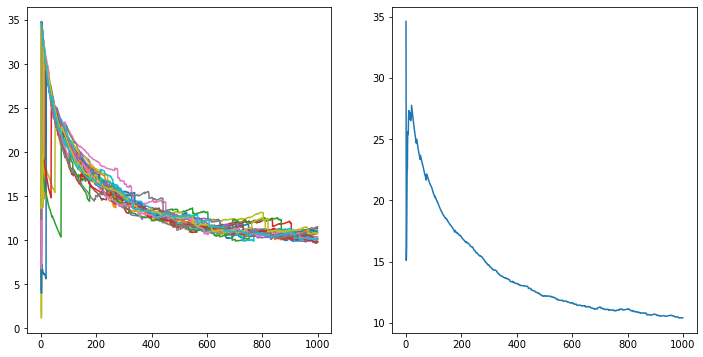

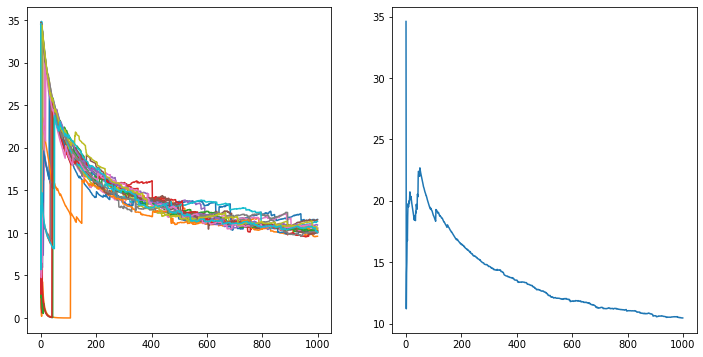

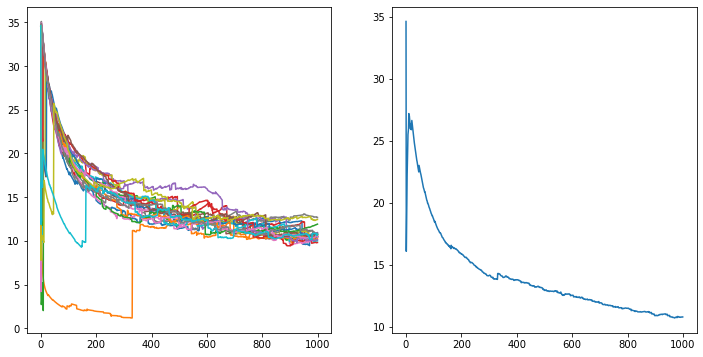

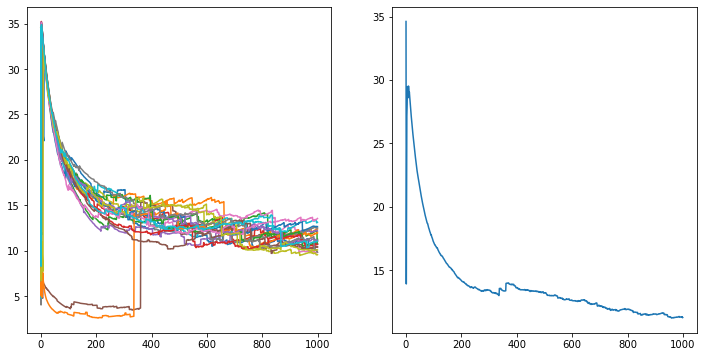

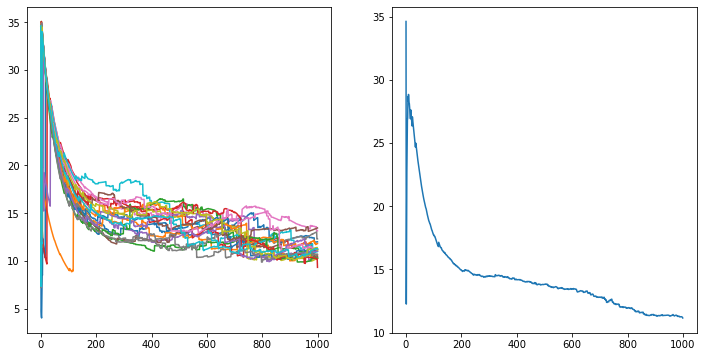

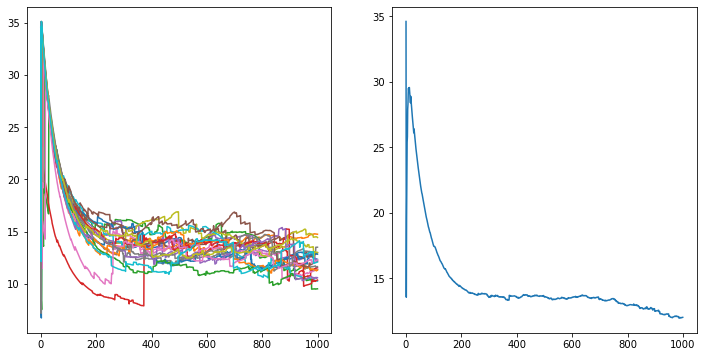

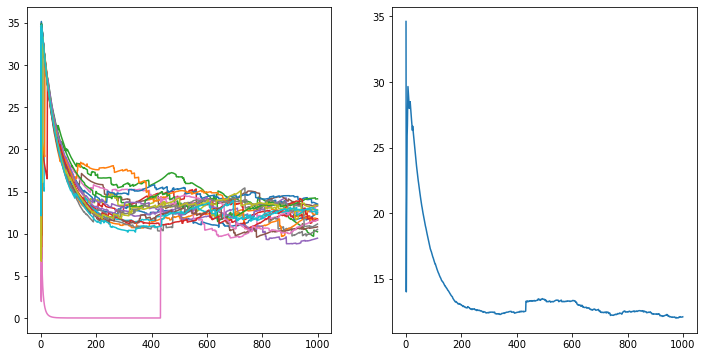

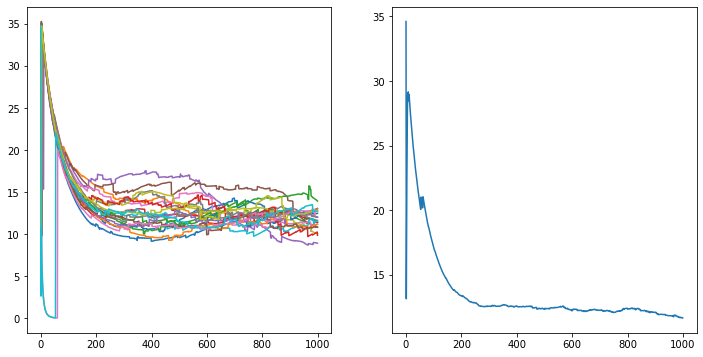

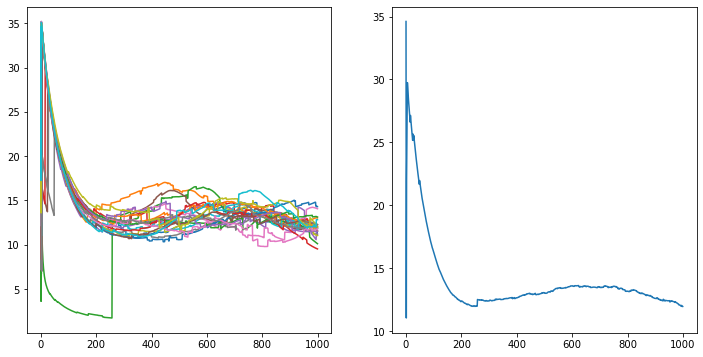

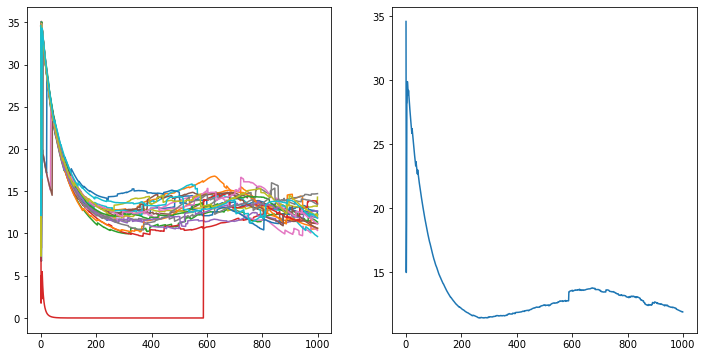

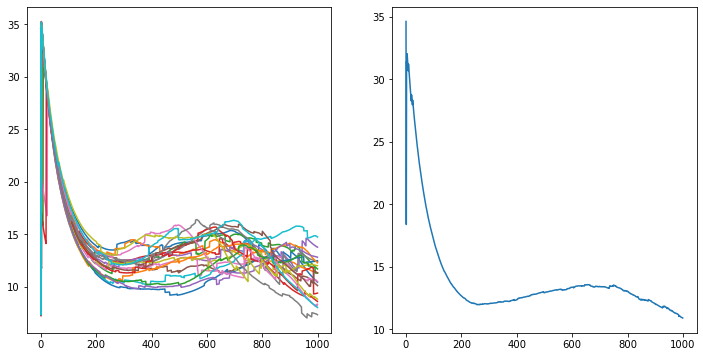

In [238]:
plot_repeat(total_reward2)

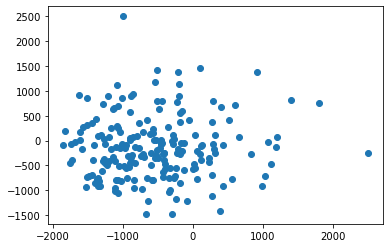

In [150]:
import networkx as nx

X_positions = np.random.gamma(7, 2, 200)
Y_positions = np.random.gamma(12, 2, 200)
X_positions = (X_positions*5000/np.max(X_positions) - 2500).astype(int)
Y_positions = (Y_positions*5000/np.max(Y_positions) - 2500).astype(int)

plt.scatter(X_positions, Y_positions)
plt.show()

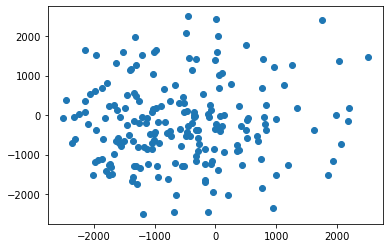

In [158]:
X = X_positions.copy()
X[X==np.max(X)] = -1500
X[X==np.max(X)] = 1100
Y = Y_positions.copy()
Y[Y==np.max(Y)] = -1500
Y[Y==np.max(Y)] = 1000

X = ((X-np.min(X))*5000/(np.max(X)-np.min(X)) - 2500).astype(int)
Y = ((Y-np.min(Y))*5000/(np.max(Y)-np.min(Y)) - 2500).astype(int)
plt.scatter(X, Y)
plt.show()

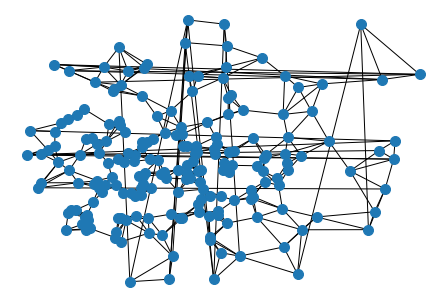

In [203]:
from framework.utils import Location

nearest_nodes = {}
node_locations = []
gateway_location = [Location(0, 0)]
n_nearest_nodes = 5
distance_threshold = 250 * 250
pos = {}
connection = {}

for i in range(len(X)):
    node_locations.append(Location(X[i], Y[i]))
    pos[i] = (X[i], Y[i])
    dx = X - X[i]
    dx1 = dx + 5000
    dx2 = dx - 5000
    dy = Y - Y[i]
    dy1 = dy + 5000
    dy2 = dy - 5000
    distance1 = dx * dx + dy * dy
    distance2 = dx1 * dx1 + dy * dy
    distance3 = dx2 * dx2 + dy * dy
    distance4 = dx * dx + dy1 * dy1
    distance5 = dx * dx + dy2 * dy2
    distance = np.min(np.array([distance1, distance2, distance3, distance4, distance5]), axis=0)
    nodes = [n for n in np.argpartition(distance,n_nearest_nodes)[:n_nearest_nodes]]
    nodes = set(nodes)
    nodes.update(list(np.argwhere(distance<distance_threshold).flatten()))
    nodes.remove(i)
    nearest_nodes[i] = nodes

    

edges = []
for i in range(len(X)):
    nodes = nearest_nodes[i].copy()
    for node in nodes:
#         if i in nearest_nodes[node]:
        if True:
            edges.append((i, node))
            

G = nx.Graph()
G.add_nodes_from(nearest_nodes.keys())
G.add_edges_from(edges)
for e in G.edges:
    if node_locations[e[0]] not in connection:
        connection[node_locations[e[0]]] = []
    connection[node_locations[e[0]]].append(node_locations[e[1]])
nx.draw(G, pos=pos, node_size=100)
plt.show()

with open('./config/random.pickle', 'wb') as f:
    pickle.dump([gateway_location, node_locations, connection], f)
    

